<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  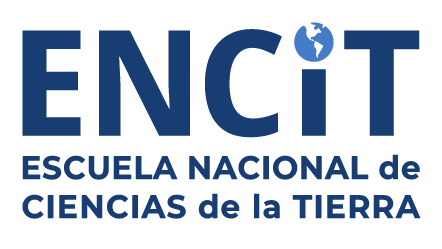
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 2: Manejo de datos</span><br/>
  <span style="color:DodgerBlue; font-size:140%;">Notebook 4: Gráficas avanzadas </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---

### <font color="ForestGreen">Introducción</font>

En este cuaderno trabajaremos tres tipos de gráficas para explorar y comunicar datos:
- **Barras (barplot)** para comparar categorías.
- **Histogramas** para ver la distribución de una variable.
- **Caja y bigotes** para resumir mediana, rango intercuartílico y posibles atípicos.

Comenzaremos con los barplots.

---


### <font color="DodgerBlue">Datos esperados</font>
Un `DataFrame` con:
- una columna numérica (la que graficaremos),
- una columna categórica (estación, tipo, sitio) para barplots,
- opcionalmente una columna de grupo (año, temporada, categoría) para comparar.

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
# carga de archivo csv
df=pd.read_csv('datos_limpios_O3.csv')
df

,Unnamed: 0,Date,value,id_station
0,1,2022-01-01 00:00:00,16.0,AJU
1,2,2022-01-01 00:00:00,2.0,ATI
2,3,2022-01-01 00:00:00,1.0,CAM
3,5,2022-01-01 00:00:00,19.0,CHO
4,7,2022-01-01 00:00:00,40.0,CUA
...,...,...,...,...
277599,525341,2023-01-01 00:00:00,31.0,AJM
277600,525343,2023-01-01 00:00:00,2.0,BJU
277601,525344,2023-01-01 00:00:00,19.0,INN
277602,525345,2023-01-01 00:00:00,2.0,GAM


In [4]:
df = df.rename(columns={"Unnamed: 0": "row_id"})   # opcional
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["value"] = pd.to_numeric(df["value"], errors="coerce")

In [5]:
prom = (df.groupby("id_station")["value"]
          .mean().sort_values(ascending=False))

In [6]:
prom

id_station
MPA    53.095530
AJM    42.241411
SFE    40.213772
AJU    39.633264
UAX    37.954391
CUA    37.865881
CCA    36.532349
PED    36.522578
TAH    36.094545
SAC    34.388453
NEZ    34.266250
BJU    34.180751
UIZ    33.713476
MON    33.340953
FAR    31.626915
VIF    31.505198
MGH    31.329923
TLI    31.135682
IZT    31.103380
CHO    30.374801
ATI    29.816738
GAM    29.771279
ACO    29.694734
MER    29.490994
TLA    29.152961
INN    28.447017
CUT    27.721542
SAG    27.386609
CAM    27.306569
FAC    27.095709
LPR    26.979909
LLA    26.173906
Name: value, dtype: float64

### <font color="SeaGreen">Barplots: cuándo y por qué</font>
- Útiles para comparar totales, promedios o conteos entre categorías.
- Funcionan bien cuando el número de categorías es moderado.
- Buenas prácticas: ordenar categorías, etiquetar ejes con unidades y evitar saturar con demasiadas barras.


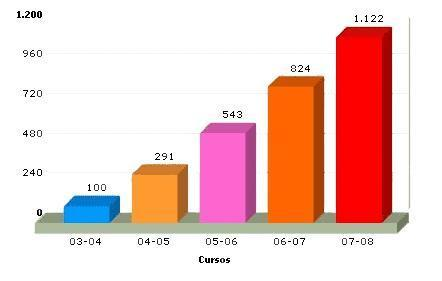

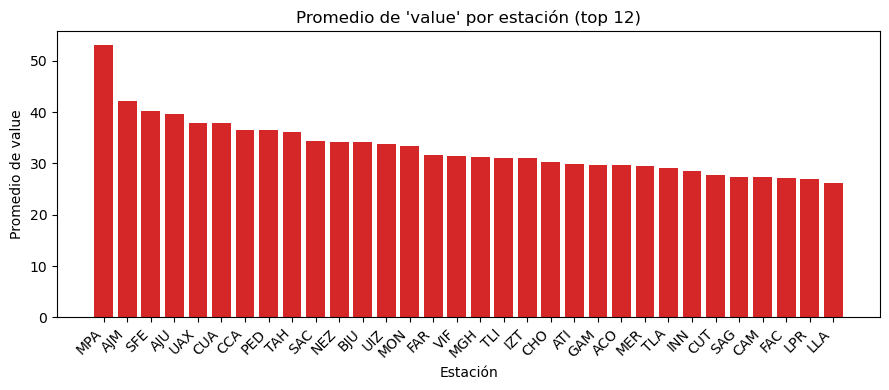

In [16]:
# hacemos figura y 'eje' de graficado al mismo tiempo
fig, ax = plt.subplots(figsize=(9,4))
ax.bar(prom.index, prom.values)
# determinar titulo y labels
ax.set_title("Promedio de 'value' por estación (top 12)")
ax.set_xlabel("Estación")
ax.set_ylabel("Promedio de value")
plt.xticks(rotation=45, ha="right")
# tight layout no deja espacios o margenes vacios
plt.tight_layout()

In [28]:
df.value

0         16.0
1          2.0
2          1.0
3         19.0
4         40.0
          ... 
277599    31.0
277600     2.0
277601    19.0
277602     2.0
277603     3.0
Name: value, Length: 277604, dtype: float64

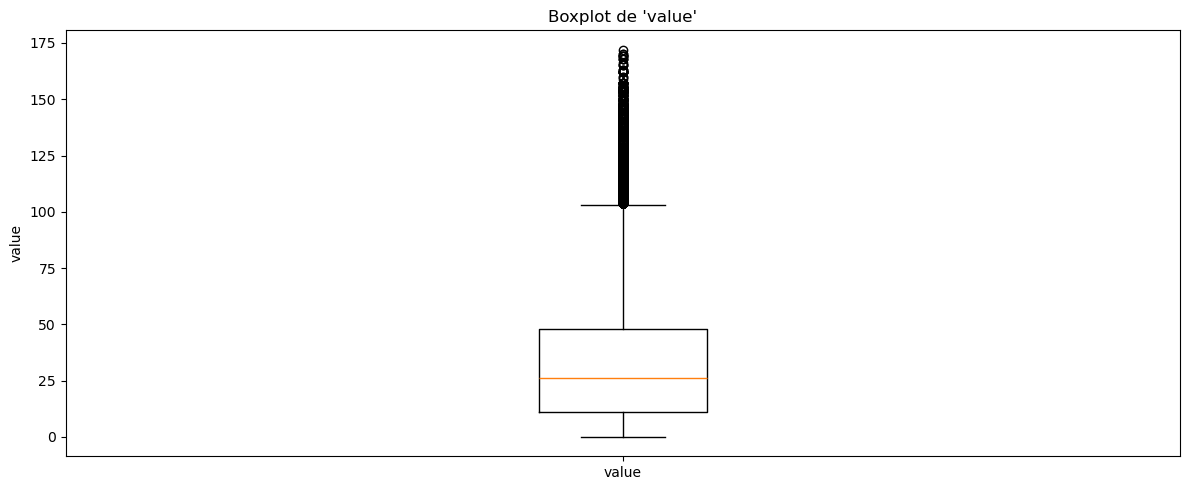

In [32]:
plt.figure(figsize=(12,5))
ax=plt.boxplot(df.value, showfliers=True)
plt.gca().set_xticklabels(["value"])
plt.gca().set_ylabel("value")
plt.gca().set_title("Boxplot de 'value'")
plt.tight_layout()

### <font color="SeaGreen"> Histograma: cuándo y por qué </font>

**Cuándo usarlo**
- Cuando quieres ver la **forma** de una variable numérica: rangos, asimetrías, colas y posibles atípicos.
- Para una **revisión rápida de calidad**: ¿hay valores imposibles?, ¿hay huecos o discretización rara?

**Por qué es útil**
- Resume grandes volúmenes de datos en una vista intuitiva de **frecuencias**.


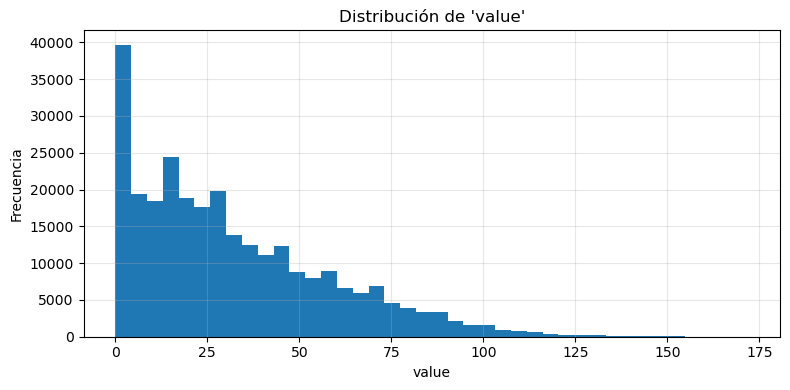

In [11]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df.value, bins=40)
ax.set_title("Distribución de 'value'")
ax.set_xlabel("value")
ax.set_ylabel("Frecuencia")
ax.grid(True, alpha=0.3)
plt.tight_layout()

### Densidad (KDE): qué es y por qué usarla

**Por qué usarla (2 razones)**
- Suaviza la distribución frente al histograma y evita depender tanto del número de bins.
- Ayuda a comparar la forma de varias series en la misma escala (picos, colas, asimetría).

**Para qué es útil (1 idea)**
- Detectar “modas” (uno o varios picos) y cambios de forma que podrían pasar desapercibidos en un histograma.

---


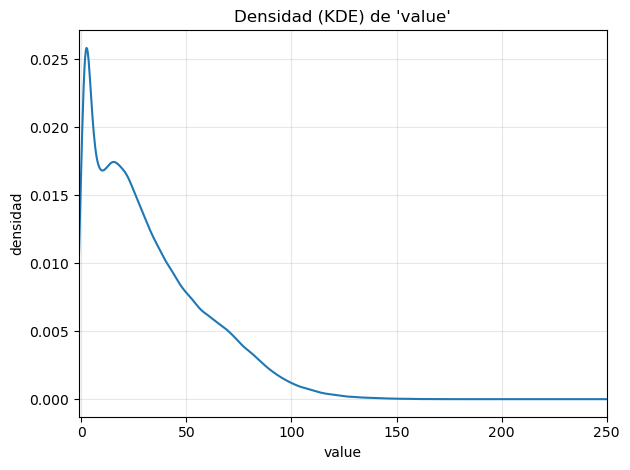

In [14]:
# Suponiendo que ya tienes el DataFrame 'df' y la columna numérica 'value'
vals = df["value"].dropna()

ax = vals.plot(kind="kde")  # Kernel Density Estimate
ax.set_xlabel("value")
ax.set_ylabel("densidad")
ax.set_title("Densidad (KDE) de 'value'")
ax.grid(True, alpha=0.3)
plt.xlim([-1,250])
plt.tight_layout()

### Personalización rápida: histogramas, densidades (KDE) y gráficos de barras

#### Histograma (`kind="hist"` o `plt.hist`)
- `bins`: número de contenedores o secuencia de bordes. Útiles: `bins=30`, `bins="auto"`, `"fd"`, `"sturges"`.
- `density`: `True` para normalizar (área = 1) y comparar muestras de distinto tamaño.
- `range`: rango numérico a graficar (recorta outliers).
- `alpha`: transparencia; ayuda cuando superpones varios histogramas.
- `color`, `edgecolor`, `linewidth`: relleno, borde y grosor del borde.
- `histtype`: `"bar"`, `"step"`, `"stepfilled"` (aspecto del histograma).
- `orientation`: `"horizontal"` para voltear el histograma.
- `grid`, `xlim`, `ylim`, `title`, `xlabel`, `ylabel`, `figsize`, `legend`: estética general.

#### Densidad KDE (`kind="kde"` o `Series.plot.kde`)
- `bw_method`: controla la suavidad (bandwidth). Menor → más suave; mayor → más rígida. Ej.: `0.3`, `0.5`, `1.0`.
- `ind`: puntos del eje x donde evaluar la curva (resolución).
- `clip`: límites para truncar la evaluación de la densidad.
- `color`, `alpha`, `linewidth`, `linestyle`: estilo de la curva.
- `grid`, `xlim`, `ylim`, `title`, `xlabel`, `ylabel`, `figsize`, `legend`: estética general.

#### Barras (`kind="bar"` / `barh` o `plt.bar`)
- `kind`: `"bar"` vertical, `"barh"` horizontal (útil para etiquetas largas).
- `width`: ancho de barra (espaciado entre categorías).
- `color`, `edgecolor`, `linewidth`, `alpha`, `hatch`: estilo de barra.
- `yerr`/`xerr`: barras de error (desv. estándar, intervalos, etc.).
- `stacked`: `True` para apilar (cuando hay varias series por categoría).
- `rot`: rotación de etiquetas del eje x (p. ej. 45) para mejorar legibilidad.
- `order` (o reordenar el índice/columnas antes de graficar): controla el orden de categorías.
- `grid`, `xlim`, `ylim`, `title`, `xlabel`, `ylabel`, `figsize`, `legend`: estética general.

> Sugerencias:
> - Empieza con `bins=20–40` en histogramas y ajusta según el tamaño de muestra.
> - Para comparar grupos de distintos tamaños: `density=True` en histogramas y usa KDE superpuestos.
> - En barras, ordena de mayor a menor y considera `barh` para nombres largos.



---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio 6 - Enchula las gráficas </font>**

Utilizando los gráficos y datos anteriores:

<font color="DarkBlue"> 1. Repite la gráfica de barras, pero modificando el color para que salgan rojas (el rojo que tú quieras). Modifica también el grosor de la línea que delinea cada barra y haz que sea de color negro. Utiliza nuestra misma función de `grafico_linea_ts` para mejorar cómo se ven los gráficos hasta una buena calidad.  
    
<font color="DarkBlue"> 2. Repite el histograma usando más bins de los que usamos en la primer versión. Luego, cambia el ancho del bin hasta que encuentres un valor que te guste. Igualmente, utiliza nuestra misma función de `grafico_linea_ts` para mejorar cómo se ven los gráficos hasta una buena calidad.  
        
---

### <font color="SeaGreen"> Seaborn: qué es y por qué usarlo </font>

Seaborn es una librería de alto nivel para gráficos estadísticos en Python, construida sobre Matplotlib. Facilita crear figuras limpias y comparables con menos código e integra bien con `pandas` (DataFrames, categorías, agregaciones).

**Por qué usarlo**
- Buenos estilos por defecto y paletas consistentes.
- Maneja agrupaciones y resúmenes (promedios, intervalos) con un parámetro (`hue`, `col`, `row`, `estimator`).
- Funciones específicas para distribución y comparación de grupos (histogramas, KDE, box/violin).

**Cuándo conviene**
- Comparar distribuciones entre grupos.
- Preparar bocetos antes de pulir detalles finos con Matplotlib.

---

Si quieres saber más, revisa: https://seaborn.pydata.org/

In [17]:
# pip install seaborn
import seaborn as sns

Text(0.5, 1.0, 'Distribución de value')

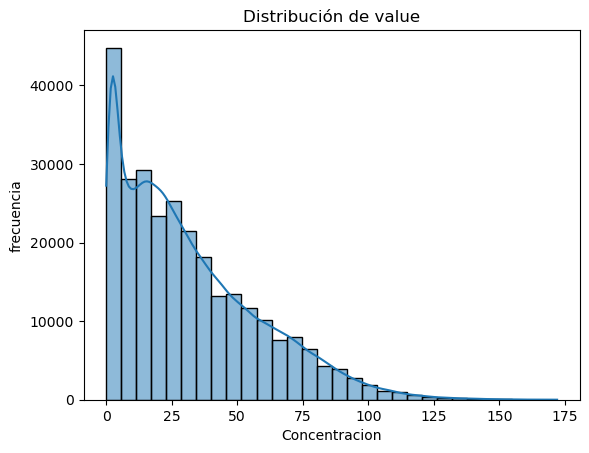

In [19]:
sns.histplot(data=df, x="value", bins=30, kde=True)
plt.xlabel("Concentracion")
plt.ylabel("frecuencia")
plt.title("Distribución de value")


### <font color="DodgerBlue">Cuándo usar cada gráfico</font>

| Gráfico         | Útil para…                                | Pregunta rápida |
|-----------------|--------------------------------------------|-----------------|
| Caja y bigote   | Comparar grupos, detectar atípicos         | ¿Quién tiene mayor mediana? ¿Hay outliers? |
| Histograma      | Ver frecuencias por bins                   | ¿Cómo se reparte la variable? |
| Densidad (KDE)  | Forma suavizada de la distribución         | ¿Una o varias “modas”? |

---
### <font color="SeaGreen"> Boxplot: qué muestra y cuándo usarlo</font>

Un boxplot resume una distribución con pocos elementos: mediana (línea central), cuartiles Q1–Q3 (la “caja”), rango intercuartílico IQR = Q3−Q1, “bigotes” (hasta 1.5·IQR) y puntos fuera de ese rango (posibles atípicos).

Cuándo usarlo
- Para comparar varias categorías de forma compacta (estaciones, sitios, periodos).
- Cuando te interesa la posición central y la dispersión sin que los outliers dominen el gráfico.

Por qué es útil
- Permite leer rápido diferencias de mediana, variabilidad y presencia de atípicos entre grupos.

---

Text(0.5, 1.0, 'Boxplot por estación')

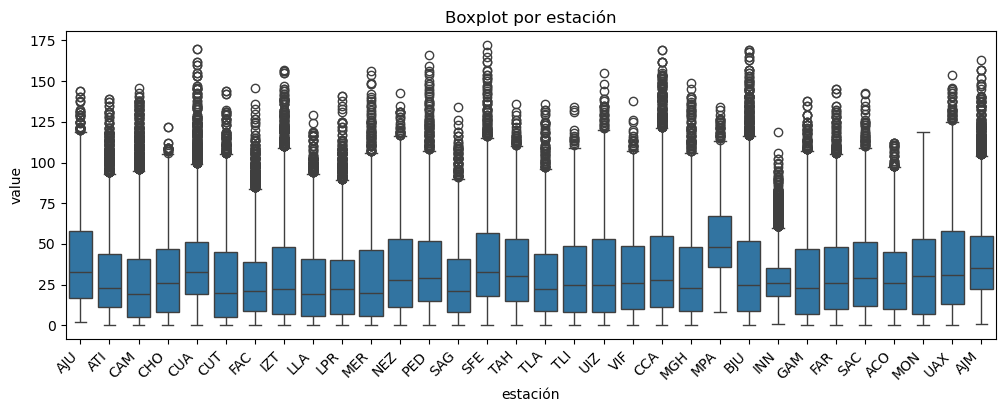

In [33]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x="id_station", y="value")
plt.xticks(rotation=45, ha="right")
plt.xlabel("estación")
plt.ylabel("value")
plt.title("Boxplot por estación")